# XGBoost

In [1]:
import pandas as pd

# Define the list of file names
file_names = [
    "../train/02-14-2018_clean.csv",
    "../train/02-15-2018_clean.csv",
    "../train/02-16-2018_clean.csv",
    "../train/02-20-2018_clean.csv",
    "../train/02-21-2018_clean.csv",
    "../train/02-22-2018_clean.csv",
    "../train/02-23-2018_clean.csv",
    "../train/02-28-2018_clean.csv",
    "../train/03-01-2018_clean.csv",
    "../train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)

(12639793, 71)


In [2]:
test = pd.read_csv("../test/test.csv")
print(test.shape)

(3159955, 72)


In [3]:
import pandas as pd

# Assuming df contains the original dataset

# Separate instances with label 5
sql_injection_instances = df[df['Label'] == 5]

# Separate instances with labels other than 5
other_instances = df[df['Label'] != 5]

# Sample a fraction from other_instances
sampled_other_instances = other_instances.sample(frac=0.01, random_state=42)

# Combine instances from label 5 and the sampled instances
df = pd.concat([sql_injection_instances, sampled_other_instances], ignore_index=True)

# Now, final_sampled_data contains the desired sampled data with label 5 instances preserved


In [4]:
import pandas as pd

# Assuming test contains the original test dataset

# Separate instances with label 5
sql_injection_instances_test = test[test['Label'] == 5]

# Separate instances with labels other than 5
other_instances_test = test[test['Label'] != 5]

# Sample a fraction from other_instances_test
sampled_other_instances_test = other_instances_test.sample(frac=0.01, random_state=42)

# Combine instances from label 5 and the sampled instances
test = pd.concat([sql_injection_instances_test, sampled_other_instances_test], ignore_index=True)

# Now, final_sampled_test contains the desired sampled test data with label 5 instances preserved


## Dropping the irrelevant features

In [5]:
features = [
    "PSH Flag Cnt",
    "Dst Port",
    "Init Fwd Win Byts",
    "RST Flag Cnt",
    "Fwd PSH Flags",
    "Bwd IAT Max",
    "Date",
    "Fwd IAT Tot",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Fwd Seg Size Min",
    "Bwd Seg Size Avg",
    "Flow Duration",
    "Init Bwd Win Byts",
    "Fwd IAT Mean",
    "Pkt Len Std",
    "Bwd Pkts/s",
    "Time",
    "Bwd Pkt Len Mean",
    "Fwd Pkt Len Max",
    "Fwd Pkts/s",
    "Bwd Header Len",
    "Bwd IAT Tot",
    "Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Max",
    "Subflow Fwd Byts",
    "Flow IAT Max",
    "ACK Flag Cnt",
    "Flow IAT Mean",
    "TotLen Fwd Pkts",
    "Fwd Header Len",
    "Protocol",
    "ECE Flag Cnt",
    "Pkt Len Var",
    "SYN Flag Cnt"
]
len(features)

36

In [6]:
cols_to_drop = [col for col in df.columns if col not in features and col != 'Label']
df.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

## training the model

In [7]:
from xgboost import XGBClassifier

X_train = df.drop('Label', axis=1)
y_train = df['Label']
X_test = test.drop('Label', axis=1)
y_test = test['Label']

In [8]:
X_test.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration',
       'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow IAT Mean', 'Flow IAT Max',
       'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max',
       'Pkt Len Std', 'Pkt Len Var', 'SYN Flag Cnt', 'RST Flag Cnt',
       'ACK Flag Cnt', 'ECE Flag Cnt', 'Bwd Seg Size Avg', 'Subflow Fwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Date',
       'Time'],
      dtype='object')

In [9]:
X_test = X_test.drop(columns='Unnamed: 0')

In [10]:
model1 = XGBClassifier(n_jobs=8)
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [11]:
model2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=8)
model2.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

/Users/anshujlayan/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.64822
[1]	validation_0-mlogloss:1.52509
[2]	validation_0-mlogloss:1.41744
[3]	validation_0-mlogloss:1.32160
[4]	validation_0-mlogloss:1.23568
[5]	validation_0-mlogloss:1.15805
[6]	validation_0-mlogloss:1.08730
[7]	validation_0-mlogloss:1.02259
[8]	validation_0-mlogloss:0.96311
[9]	validation_0-mlogloss:0.90818
[10]	validation_0-mlogloss:0.85734
[11]	validation_0-mlogloss:0.81013
[12]	validation_0-mlogloss:0.76615
[13]	validation_0-mlogloss:0.72514
[14]	validation_0-mlogloss:0.68681
[15]	validation_0-mlogloss:0.65093
[16]	validation_0-mlogloss:0.61729
[17]	validation_0-mlogloss:0.58568
[18]	validation_0-mlogloss:0.55598
[19]	validation_0-mlogloss:0.52804
[20]	validation_0-mlogloss:0.50168
[21]	validation_0-mlogloss:0.47684
[22]	validation_0-mlogloss:0.45342
[23]	validation_0-mlogloss:0.43129
[24]	validation_0-mlogloss:0.41039
[25]	validation_0-mlogloss:0.39086
[26]	validation_0-mlogloss:0.37240
[27]	validation_0-mlogloss:0.35493
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=8, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [12]:
y_pred_model1 = model1.predict(X_test)
y_pred_model2 = model2.predict(X_test)

## Model Evaluation

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# For model 1
accuracy_model1 = accuracy_score(y_test, y_pred_model1)
precision_model1 = precision_score(y_test, y_pred_model1, average='weighted')
recall_model1 = recall_score(y_test, y_pred_model1, average='weighted')
f1_model1 = f1_score(y_test, y_pred_model1, average='weighted')

print("Model 1 Accuracy: ", accuracy_model1)
print("Model 1 Precision: ", precision_model1)
print("Model 1 Recall: ", recall_model1)
print("Model 1 F1 Score: ", f1_model1)

Model 1 Accuracy:  0.9929475015812776
Model 1 Precision:  0.9925658792561916
Model 1 Recall:  0.9929475015812776
Model 1 F1 Score:  0.9927191773322551


In [14]:
# For model 2
accuracy_model2 = accuracy_score(y_test, y_pred_model2)
precision_model2 = precision_score(y_test, y_pred_model2, average='weighted')
recall_model2 = recall_score(y_test, y_pred_model2, average='weighted')
f1_model2 = f1_score(y_test, y_pred_model2, average='weighted')

print("Model 2 Accuracy: ", accuracy_model2)
print("Model 2 Precision: ", precision_model2)
print("Model 2 Recall: ", recall_model2)
print("Model 2 F1 Score: ", f1_model2)

Model 2 Accuracy:  0.9929475015812776
Model 2 Precision:  0.9922368204512942
Model 2 Recall:  0.9929475015812776
Model 2 F1 Score:  0.9923791447260947


### Confusion matrices

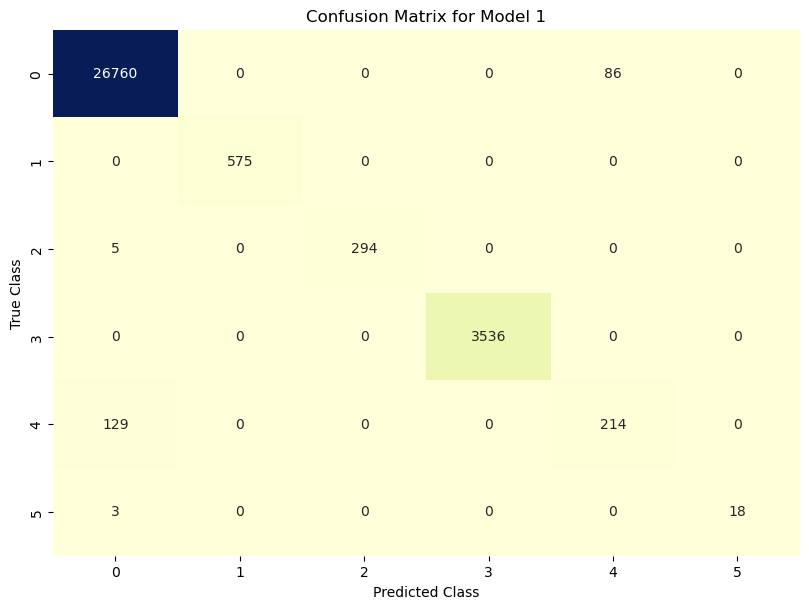

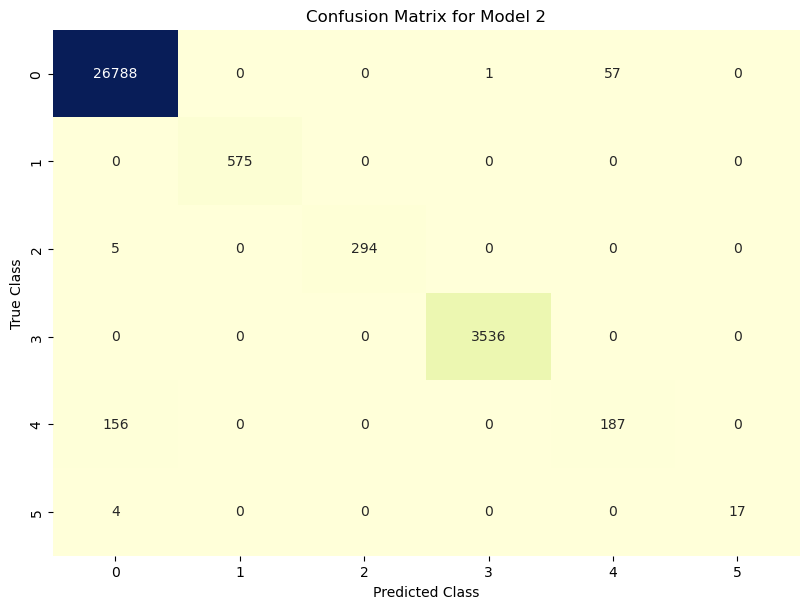

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix for model1
cm_model1 = confusion_matrix(y_test, y_pred_model1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model1, annot=True, cbar=None, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix for Model 1"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Compute confusion matrix for model2
cm_model2 = confusion_matrix(y_test, y_pred_model2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model2, annot=True, cbar=None, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix for Model 2"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [16]:
print(3)

3


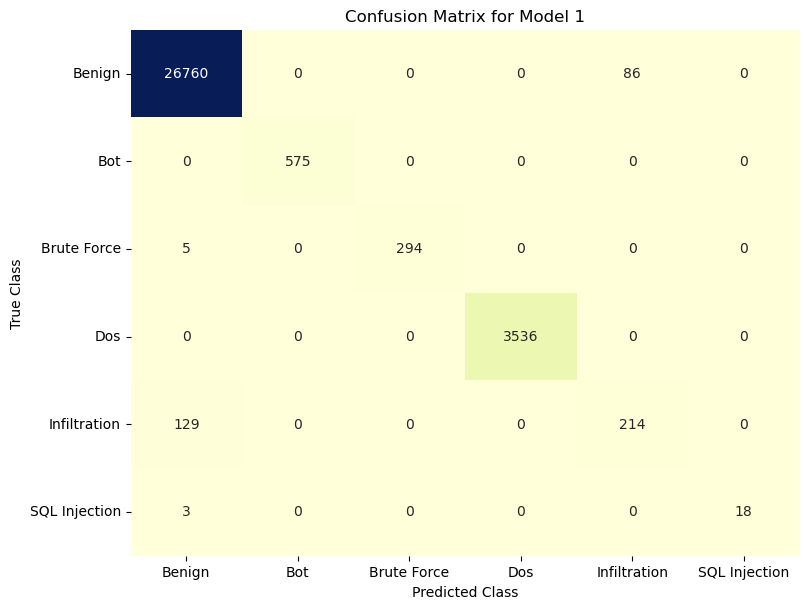

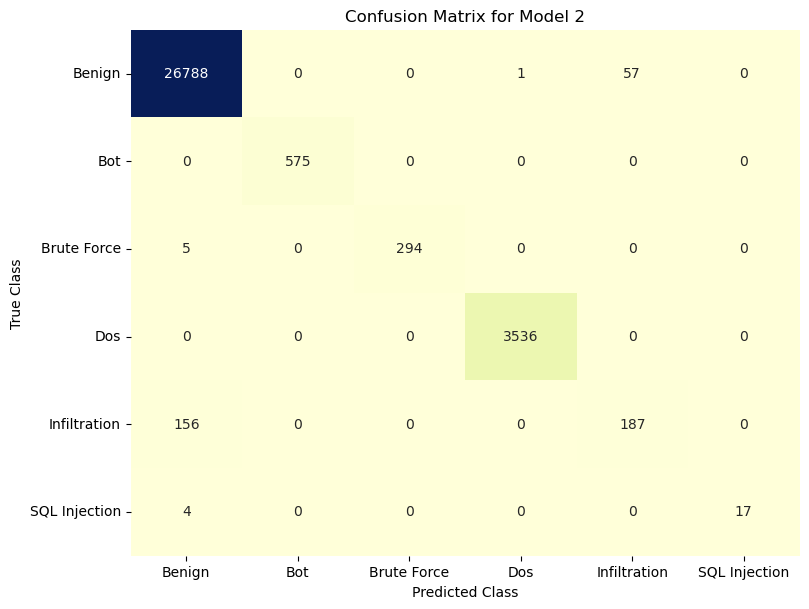

In [17]:
label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Compute confusion matrix for model1
cm_model1 = confusion_matrix(y_test, y_pred_model1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model1, annot=True, cbar=None, cmap="YlGnBu", fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix for Model 1"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# Compute confusion matrix for model2
cm_model2 = confusion_matrix(y_test, y_pred_model2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_model2, annot=True, cbar=None, cmap="YlGnBu", fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix for Model 2"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


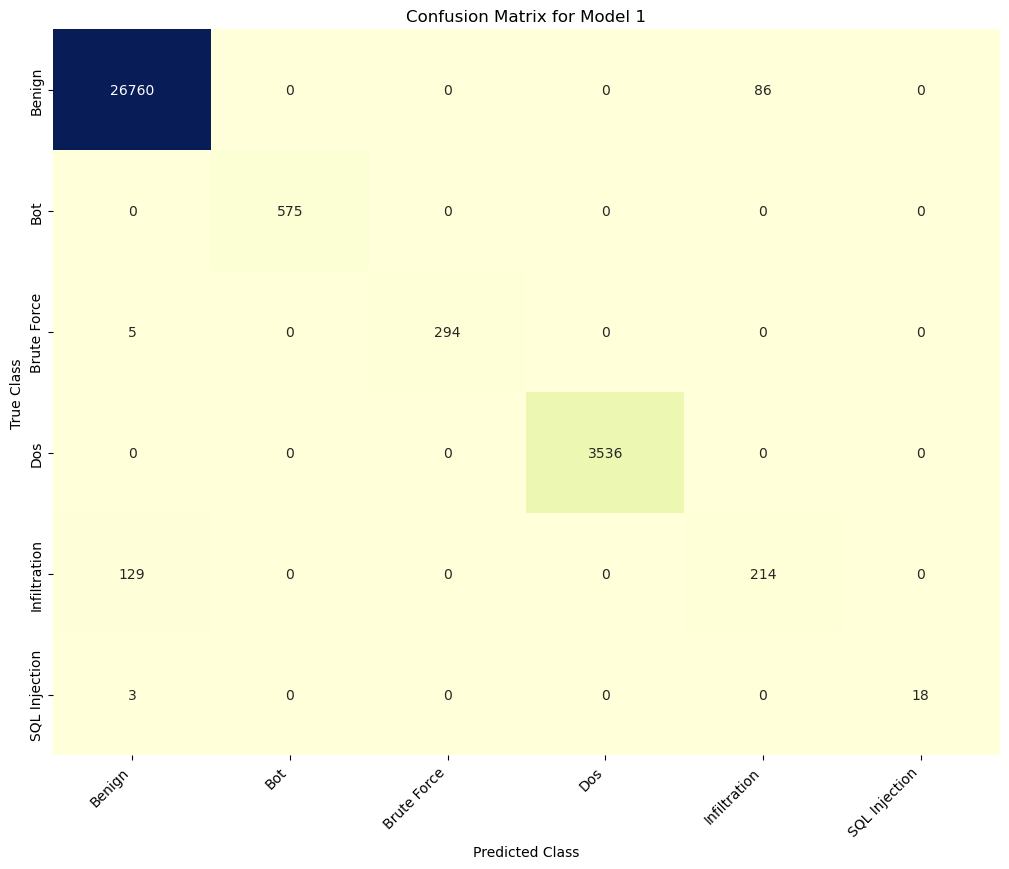

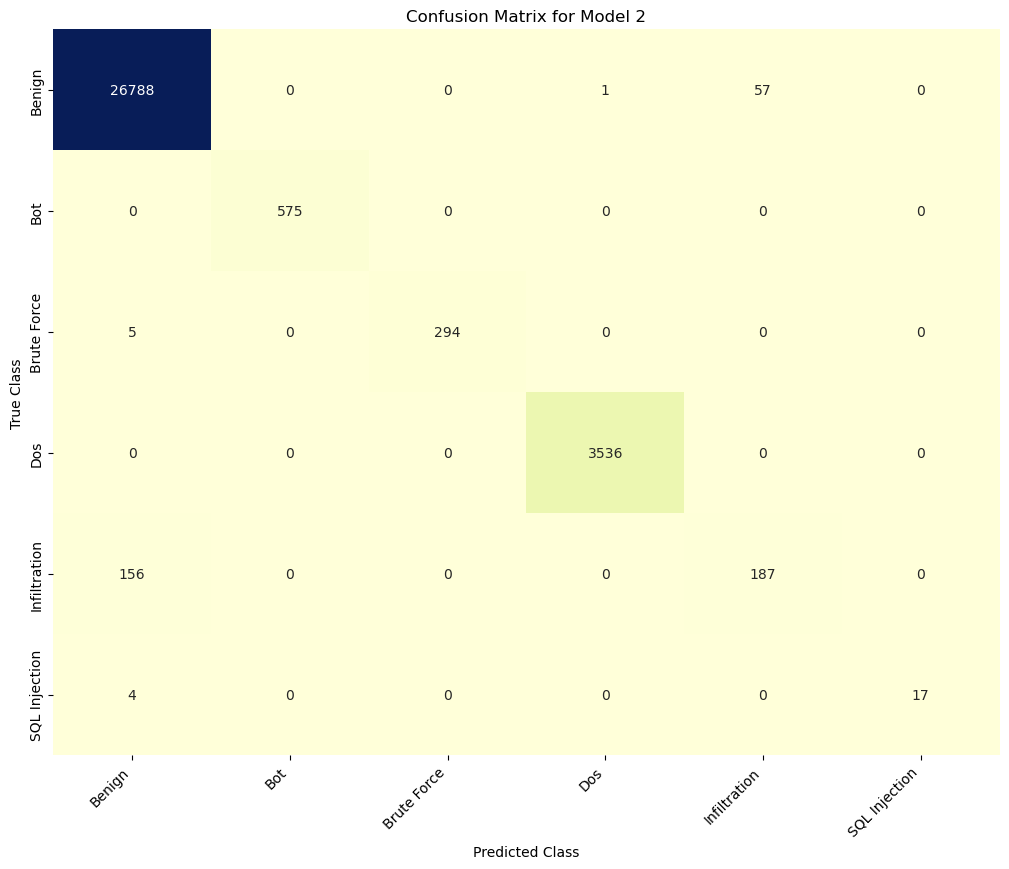

In [18]:
label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Compute confusion matrix for model1
cm_model1 = confusion_matrix(y_test, y_pred_model1)

plt.figure(figsize=(10, 8))  # Increase the figure size
sns.heatmap(cm_model1, annot=True, cbar=None, cmap="YlGnBu", fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix for Model 1"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis tick labels
plt.show()

# Compute confusion matrix for model2
cm_model2 = confusion_matrix(y_test, y_pred_model2)

plt.figure(figsize=(10, 8))  # Increase the figure size
sns.heatmap(cm_model2, annot=True, cbar=None, cmap="YlGnBu", fmt="d", xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix for Model 2"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis tick labels
plt.show()
